## Librerías básicas

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import time

## Librerías para visualización

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

/home/pablocv/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## LIBSVM y SVM-SGD

In [3]:
from svmutil import *
from sklearn.linear_model import SGDClassifier
from sklearn import svm

### EJEMPLO

In [4]:
def generate_example_rbf(n_samples):
    
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    clf = svm.NuSVC()
    clf.fit(X, Y)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()

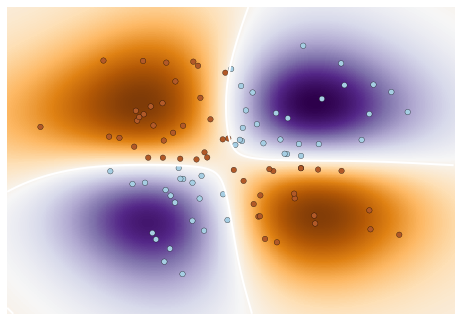

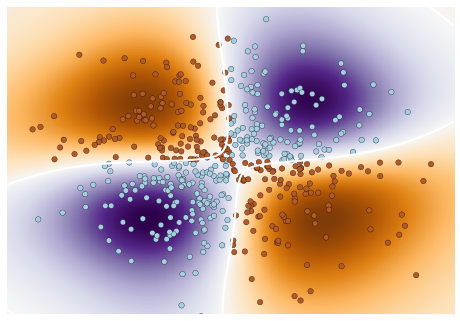

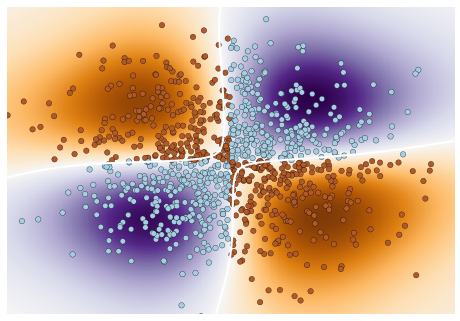

In [5]:
generate_example_rbf(100)
generate_example_rbf(500)
generate_example_rbf(1000)

In [6]:
def generate_example_sgd(n_samples):
    
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    clf = SGDClassifier()
    clf.fit(X, Y)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()

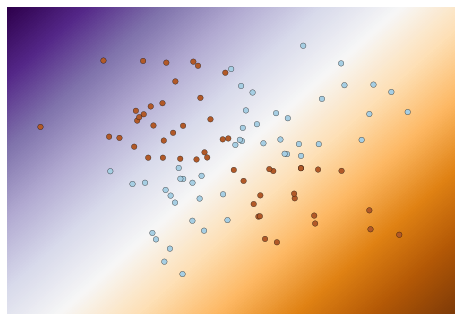

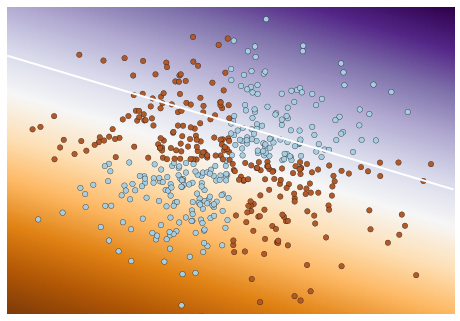

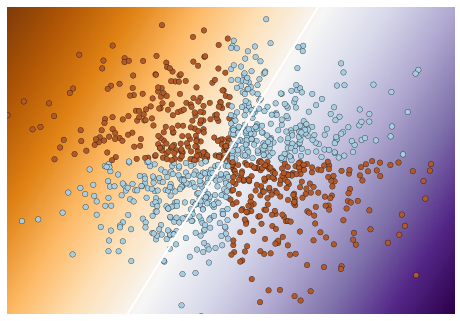

In [7]:
generate_example_sgd(100)
generate_example_sgd(500)
generate_example_sgd(1000)

In [4]:
def test_svmsgd(cs, n_vars, regularizer, n_epochs):

    #cs = np.logspace(2,5,4)
    n_total = int(cs[len(cs)-1]*1.2)
    n_test = int(cs[len(cs)-1]*.2)

    acc_trains_svmsgd = np.zeros(len(cs))
    acc_tests_svmsgd = np.zeros(len(cs))
    times_svmsgd = np.zeros(len(cs))

    i=0
    import time

    X, y = make_classification(n_samples = n_total, n_features=n_vars, n_redundant=0, n_informative=n_vars,
                           random_state=108783, n_clusters_per_class=1)

    rng = np.random.RandomState(108783)
    X = X + 2 * rng.uniform(size=X.shape)

    X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = n_test, random_state = 108783)

    for c in cs:
        n_samples = int(c)
        print n_samples
        X_train = X_train_full[:n_samples]
        y_train = y_train_full[:n_samples]
        clf = SGDClassifier(loss='hinge', penalty='l2',alpha=regularizer, n_iter=n_epochs, fit_intercept=True, l1_ratio=1)
        start = time.clock()
        clf.fit(X_train, y_train)
        end = time.clock()
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        acc_trains_svmsgd[i] = np.mean(y_pred_train == y_train)*100
        acc_tests_svmsgd[i] = np.mean(y_pred_test == y_test)*100
        times_svmsgd[i]= end - start
        i = i + 1
    return acc_trains_svmsgd, acc_tests_svmsgd, times_svmsgd

In [5]:
def test_svmsgd_nonlinear(cs, n_vars, regularizer, n_epochs):

    n_total = int(cs[len(cs)-1]*1.2)
    n_test = int(cs[len(cs)-1]*.2)

    acc_trains_svmsgd = np.zeros(len(cs))
    acc_tests_svmsgd = np.zeros(len(cs))
    times_svmsgd = np.zeros(len(cs))

    i=0
    import time
    np.random.seed(108783)
    X = np.random.randn(n_total, n_vars)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = n_test, random_state = 108783)

    for c in cs:
        n_samples = int(c)
        print n_samples
        X_train = X_train_full[:n_samples]
        y_train = y_train_full[:n_samples]
        clf = SGDClassifier(loss='hinge', penalty='l2',alpha=regularizer, n_iter=n_epochs, fit_intercept=True, l1_ratio=1)
        start = time.clock()
        clf.fit(X_train, y_train)
        end = time.clock()
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        acc_trains_svmsgd[i] = np.mean(y_pred_train == y_train)*100
        acc_tests_svmsgd[i] = np.mean(y_pred_test == y_test)*100
        times_svmsgd[i]= end - start
        i = i + 1
    return acc_trains_svmsgd, acc_tests_svmsgd, times_svmsgd

In [6]:
def test_libsvm(cs, n_vars, kerneltype, gamma, regularizer, cache, shr):

    #cs = np.logspace(2,5,4)
    n_total = int(cs[len(cs)-1]*1.2)
    n_test = int(cs[len(cs)-1]*.2)

    acc_trains_libsvm = np.zeros(len(cs))
    acc_tests_libsvm = np.zeros(len(cs))
    times_libsvm = np.zeros(len(cs))

    i=0
    import time

    X, y = make_classification(n_samples = n_total, n_features=10, n_redundant=0, n_informative=10,
                           random_state=108783, n_clusters_per_class=1)

    rng = np.random.RandomState(108783)
    X = X + 2 * rng.uniform(size=X.shape)

    X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = n_test, random_state = 108783)
    
    for c in cs:
        n_samples = int(c)
        print n_samples
        X_train = X_train_full[:n_samples]
        y_train = y_train_full[:n_samples]
        prob = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter('-t %i -g %d -c %d -m %i -h %i' %(kerneltype, gamma, regularizer, cache, shr))
        start = time.clock()
        model = svm_train(prob, param)
        end = time.clock()
        label_train, acc_train_libsvm, val_train = svm_predict(y_train.tolist(), X_train.tolist(), model, '-b 0')
        label_test, acc_test_libsvm, val_test = svm_predict(y_test.tolist(), X_test.tolist(), model, '-b 0')
        acc_trains_libsvm[i] = acc_train_libsvm[0]
        acc_tests_libsvm[i] = acc_test_libsvm[0]
        times_libsvm[i] = end - start
        i = i + 1
    return acc_trains_libsvm, acc_tests_libsvm, times_libsvm

In [7]:
def test_libsvm_nonlinear(cs, n_vars, kerneltype, gamma, regularizer, cache, shr):

    #cs = np.logspace(2,5,4)
    n_total = int(cs[len(cs)-1]*1.2)
    n_test = int(cs[len(cs)-1]*.2)

    acc_trains_libsvm = np.zeros(len(cs))
    acc_tests_libsvm = np.zeros(len(cs))
    times_libsvm = np.zeros(len(cs))

    i=0
    import time

    X = np.random.randn(n_total, n_vars)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

    X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = n_test, random_state = 108783)
    
    for c in cs:
        n_samples = int(c)
        print n_samples
        X_train = X_train_full[:n_samples]
        y_train = y_train_full[:n_samples]
        prob = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter('-t %i -g %d -c %d -m %i -h %i' %(kerneltype, gamma, regularizer, cache, shr))
        start = time.clock()
        model = svm_train(prob, param)
        end = time.clock()
        label_train, acc_train_libsvm, val_train = svm_predict(y_train.tolist(), X_train.tolist(), model, '-b 0')
        label_test, acc_test_libsvm, val_test = svm_predict(y_test.tolist(), X_test.tolist(), model, '-b 0')
        acc_trains_libsvm[i] = acc_train_libsvm[0]
        acc_tests_libsvm[i] = acc_test_libsvm[0]
        times_libsvm[i] = end - start
        i = i + 1
    return acc_trains_libsvm, acc_tests_libsvm, times_libsvm

In [8]:
def draw_size_acc(sizes, acc_trains, acc_tests, title, loc):
    plt.plot(np.log10(sizes), acc_trains,'r-.',label='Train')
    plt.plot(np.log10(sizes), acc_tests,'b-.',label='Test')
    ymin, ymax = plt.ylim()
    plt.xlabel('Sample Size (Log Scale)')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.axis('tight')
    plt.legend(loc=loc)
    plt.show()

In [9]:
def draw_size_time_2(sizes, times_1, times_2, label_1, label_2, title, loc):
    plt.plot(np.log10(sizes), times_1,'r-.',label=label_1)
    plt.plot(np.log10(sizes), times_2,'b-.',label=label_2)
    ymin, ymax = plt.ylim()
    plt.xlabel('Sample Size (Log Scale)')
    plt.ylabel('Training Time')
    plt.title(title)
    plt.axis('tight')
    plt.legend(loc=loc)
    plt.show()
    
def draw_size_time_3(sizes, times_1, times_2, times_3, label_1, label_2, label_3, title, loc):
    plt.plot(np.log10(sizes), times_1,'r-.',label=label_1)
    plt.plot(np.log10(sizes), times_2,'b-.',label=label_2)
    plt.plot(np.log10(sizes), times_3,'g-.',label=label_3)
    ymin, ymax = plt.ylim()
    plt.xlabel('Sample Size (Log Scale)')
    plt.ylabel('Training Time')
    plt.title(title)
    plt.axis('tight')
    plt.legend(loc=loc)
    plt.show()

## 5.1.1 CURVAS DE APRENDIZAJE

### SVMSGD

100
1000
10000
100000


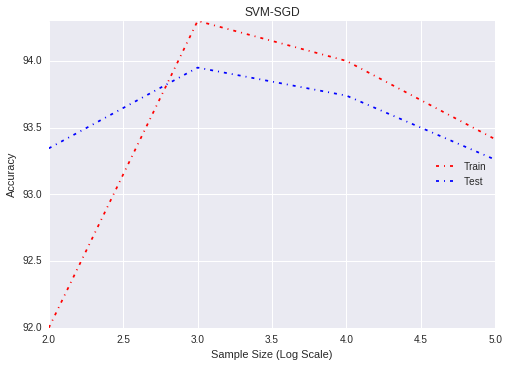

[    100.    1000.   10000.  100000.]
[ 92.     94.3    94.     93.413]
[ 93.345  93.95   93.74   93.26 ]
[ 0.000462  0.001971  0.014001  0.232529]


In [48]:
sizes = np.logspace(2,5,4)
np.random.seed(108783)
acc_tr_svmsgd , acc_ts_svmsgd, times_svmsgd = test_svmsgd(sizes, n_vars=10, regularizer = 1, n_epochs = 10)
draw_size_acc(sizes, acc_tr_svmsgd, acc_ts_svmsgd, 'SVM-SGD', 'center right')
print sizes
print acc_tr_svmsgd
print acc_ts_svmsgd
print times_svmsgd

### LIBSVM (LINEAR)

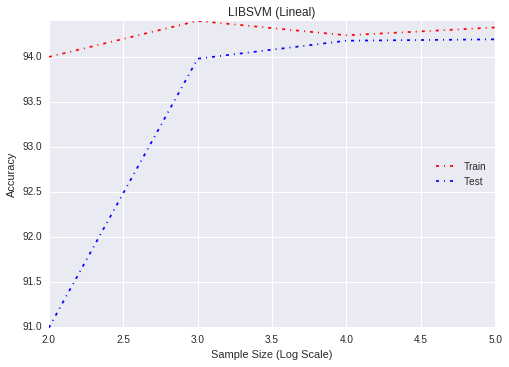

[    100.    1000.   10000.  100000.]
[ 94.     94.4    94.24   94.327]
[ 90.99   93.98   94.18   94.195]
[  4.90000000e-04   1.83340000e-02   2.37096600e+00   5.48171083e+02]


In [29]:
sizes=np.logspace(2,5,4)
#acc_trains_lin, acc_tests_lin, times_lin = test_libsvm(sizes, kerneltype = 0, gamma = 1, n_vars=10, regularizer = 1, cache = 100, shr = 1)
draw_size_acc(sizes, acc_trains_lin, acc_tests_lin, 'LIBSVM (Lineal)','center right')
print sizes
print acc_trains_lin
print acc_tests_lin
print times_lin

100
Accuracy = 100% (100/100) (classification)
Accuracy = 94.51% (18902/20000) (classification)
1000
Accuracy = 99.8% (998/1000) (classification)
Accuracy = 97.875% (19575/20000) (classification)
10000
Accuracy = 98.93% (9893/10000) (classification)
Accuracy = 98.34% (19668/20000) (classification)
100000
Accuracy = 98.765% (98765/100000) (classification)
Accuracy = 98.545% (19709/20000) (classification)


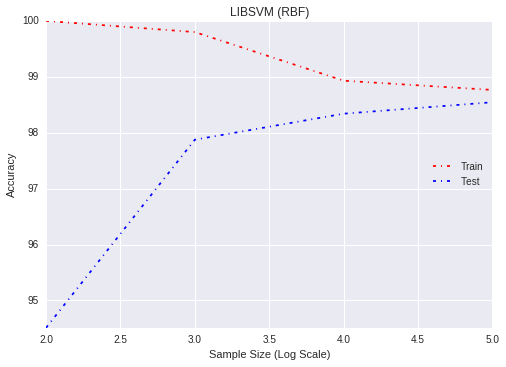

[    100.    1000.   10000.  100000.]
[ 100.      99.8     98.93    98.765]
[ 94.51   97.875  98.34   98.545]
[  2.58000000e-04   5.14320000e-02   1.48721500e+00   2.52741227e+02]


In [30]:
sizes=np.logspace(2,5,4)
#acc_trains_rbf, acc_tests_rbf, times_rbf = test_libsvm(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 1)
draw_size_acc(sizes, acc_trains_rbf, acc_tests_rbf, 'LIBSVM (RBF)', 'center right')
print sizes
print acc_trains_rbf
print acc_tests_rbf
print times_rbf

### SVMSGD

100
1000
10000
100000


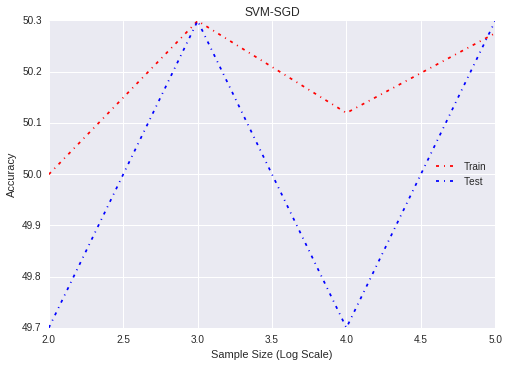

[    100.    1000.   10000.  100000.]
[ 50.     50.3    50.12   50.276]
[ 49.7  50.3  49.7  50.3]
[ 0.000431  0.001907  0.007933  0.115161]


In [54]:
sizes = np.logspace(2,5,4)
acc_tr_svmsgd , acc_ts_svmsgd, times_svmsgd = test_svmsgd_nonlinear(sizes, n_vars=2, regularizer = 1, n_epochs = 10)
draw_size_acc(sizes, acc_tr_svmsgd, acc_ts_svmsgd, 'SVM-SGD', 'center right')
print sizes
print acc_tr_svmsgd
print acc_ts_svmsgd
print times_svmsgd

### LIBSVM (RBF)

100
Accuracy = 94% (94/100) (classification)
Accuracy = 62.02% (12404/20000) (classification)
1000
Accuracy = 92.6% (926/1000) (classification)
Accuracy = 81.59% (16318/20000) (classification)
10000
Accuracy = 96.05% (9605/10000) (classification)
Accuracy = 92.595% (18519/20000) (classification)
100000
Accuracy = 98.211% (98211/100000) (classification)
Accuracy = 97.43% (19486/20000) (classification)


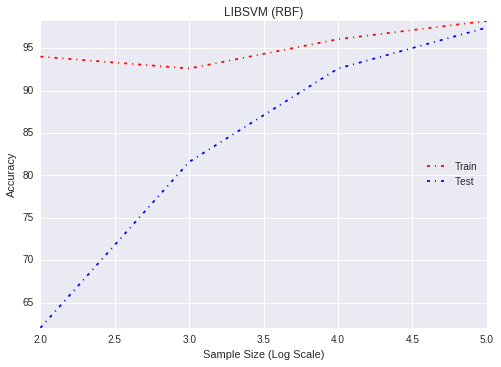

[    100.    1000.   10000.  100000.]
[ 94.     92.6    96.05   98.211]
[ 62.02   81.59   92.595  97.43 ]
[  1.38100000e-03   4.56100000e-02   3.14064900e+00   2.71713218e+02]


In [32]:
sizes=np.logspace(2,5,4)
acc_trains_rbf, acc_tests_rbf, times_rbf = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 1)
draw_size_acc(sizes, acc_trains_rbf, acc_tests_rbf, 'LIBSVM (RBF)', 'center right')
print sizes
print acc_trains_rbf
print acc_tests_rbf
print times_rbf

## 5.1.2 NÚMERO DE VARIABLES

### SVMSGD

[    100.    1000.   10000.  100000.]
100
1000
10000
100000
[ 92.     94.3    94.     93.413]
[ 93.345  93.95   93.74   93.26 ]
[ 0.000534  0.002422  0.012719  0.217996]
100
1000
10000
100000
[ 97.     93.3    92.6    92.627]
[ 88.31   91.56   92.605  92.43 ]
[ 0.000586  0.00278   0.021394  0.266142]
100
1000
10000
100000
[ 100.      92.3     93.2     93.328]
[ 84.635  92.935  93.185  93.815]
[ 0.000648  0.003512  0.06356   0.312653]


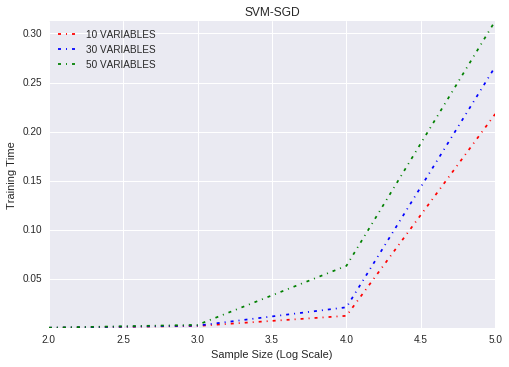

In [67]:
sizes = np.logspace(2,5,4)
print sizes
np.random.seed(108783)
acc_tr_svmsgd_10v, acc_ts_svmsgd_10v, times_svmsgd_10v = test_svmsgd(sizes, n_vars=10, regularizer = 1, n_epochs = 10)
print acc_tr_svmsgd_10v
print acc_ts_svmsgd_10v
print times_svmsgd_10v
acc_tr_svmsgd_30v, acc_ts_svmsgd_30v, times_svmsgd_30v = test_svmsgd(sizes, n_vars=30, regularizer = 1, n_epochs = 10)
print acc_tr_svmsgd_30v
print acc_ts_svmsgd_30v
print times_svmsgd_30v
acc_tr_svmsgd_50v, acc_ts_svmsgd_50v, times_svmsgd_50v = test_svmsgd(sizes, n_vars=50, regularizer = 1, n_epochs = 10)
print acc_tr_svmsgd_50v
print acc_ts_svmsgd_50v
print times_svmsgd_50v
draw_size_time_3(sizes, times_svmsgd_10v, times_svmsgd_30v, times_svmsgd_50v, '10 VARIABLES', '30 VARIABLES', '50 VARIABLES',
                'SVM-SGD','upper left')

[    100.    1000.   10000.  100000.]
100
Accuracy = 94% (94/100) (classification)
Accuracy = 90.99% (18198/20000) (classification)
1000
Accuracy = 94.4% (944/1000) (classification)
Accuracy = 93.98% (18796/20000) (classification)
10000
Accuracy = 94.24% (9424/10000) (classification)
Accuracy = 94.18% (18836/20000) (classification)
100000
Accuracy = 94.327% (94327/100000) (classification)
Accuracy = 94.195% (18838/20000) (classification)
[ 94.     94.4    94.24   94.327]
[ 90.99   93.98   94.18   94.195]
[  7.47000000e-04   2.69340000e-02   1.89067300e+00   5.39854925e+02]
100
Accuracy = 94% (94/100) (classification)
Accuracy = 90.99% (18198/20000) (classification)
1000
Accuracy = 94.4% (944/1000) (classification)
Accuracy = 93.98% (18796/20000) (classification)
10000
Accuracy = 94.24% (9424/10000) (classification)
Accuracy = 94.18% (18836/20000) (classification)
100000
Accuracy = 94.327% (94327/100000) (classification)
Accuracy = 94.195% (18838/20000) (classification)
[ 94.     94.4  

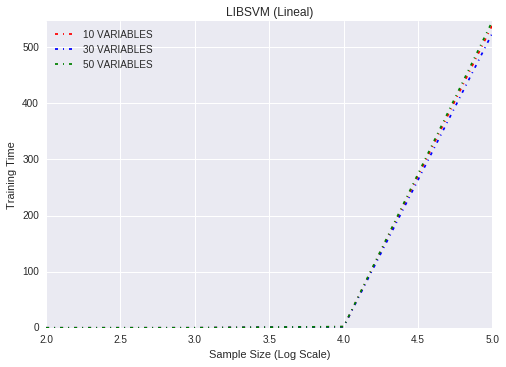

In [69]:
sizes = np.logspace(2,5,4)
#sizes = np.logspace(2,4,3)
print sizes
acc_tr_libsvm_10v, acc_ts_libsvm_10v, times_libsvm_10v = test_libsvm(sizes, kerneltype = 0, gamma = 1, n_vars=10, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_10v
print acc_ts_libsvm_10v
print times_libsvm_10v
acc_tr_libsvm_30v, acc_ts_libsvm_30v, times_libsvm_30v = test_libsvm(sizes, kerneltype = 0, gamma = 1, n_vars=30, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_30v
print acc_ts_libsvm_30v
print times_libsvm_30v
acc_tr_libsvm_50v, acc_ts_libsvm_50v, times_libsvm_50v = test_libsvm(sizes, kerneltype = 0, gamma = 1, n_vars=50, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_50v
print acc_ts_libsvm_50v
print times_libsvm_50v
draw_size_time_3(sizes, times_libsvm_10v, times_libsvm_30v, times_libsvm_50v, '10 VARIABLES', '30 VARIABLES', '50 VARIABLES',
                'LIBSVM (Lineal)', 'upper left')

[    100.    1000.   10000.  100000.]
100
Accuracy = 100% (100/100) (classification)
Accuracy = 94.51% (18902/20000) (classification)
1000
Accuracy = 99.8% (998/1000) (classification)
Accuracy = 97.875% (19575/20000) (classification)
10000
Accuracy = 98.93% (9893/10000) (classification)
Accuracy = 98.34% (19668/20000) (classification)
100000
Accuracy = 98.765% (98765/100000) (classification)
Accuracy = 98.545% (19709/20000) (classification)
[ 100.      99.8     98.93    98.765]
[ 94.51   97.875  98.34   98.545]
[  7.60000000e-04   5.29620000e-02   1.77087700e+00   2.58406013e+02]
100
Accuracy = 100% (100/100) (classification)
Accuracy = 94.51% (18902/20000) (classification)
1000
Accuracy = 99.8% (998/1000) (classification)
Accuracy = 97.875% (19575/20000) (classification)
10000
Accuracy = 98.93% (9893/10000) (classification)
Accuracy = 98.34% (19668/20000) (classification)
100000
Accuracy = 98.765% (98765/100000) (classification)
Accuracy = 98.545% (19709/20000) (classification)
[ 100.

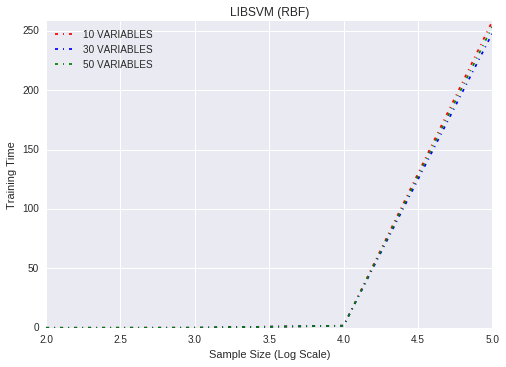

In [70]:
sizes = np.logspace(2,5,4)
#sizes = np.logspace(2,4,3)
print sizes
acc_tr_libsvm_10v, acc_ts_libsvm_10v, times_libsvm_10v = test_libsvm(sizes, kerneltype = 2, gamma = .1, n_vars=10, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_10v
print acc_ts_libsvm_10v
print times_libsvm_10v
acc_tr_libsvm_30v, acc_ts_libsvm_30v, times_libsvm_30v = test_libsvm(sizes, kerneltype = 2, gamma = .1, n_vars=30, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_30v
print acc_ts_libsvm_30v
print times_libsvm_30v
acc_tr_libsvm_50v, acc_ts_libsvm_50v, times_libsvm_50v = test_libsvm(sizes, kerneltype = 2, gamma = .1, n_vars=50, regularizer = 1, cache = 100, shr = 1)
print acc_tr_libsvm_50v
print acc_ts_libsvm_50v
print times_libsvm_50v
draw_size_time_3(sizes, times_libsvm_10v, times_libsvm_30v, times_libsvm_50v, '10 VARIABLES', '30 VARIABLES', '50 VARIABLES',
                'LIBSVM (RBF)', 'upper left')

## 5.1.3 NÚMERO DE EPOCHS

100
1000
10000
100000
[ 92.     94.3    94.     93.413]
[ 93.345  93.95   93.74   93.26 ]
[ 0.002253  0.002187  0.011143  0.24382 ]
100
1000
10000
100000
[ 91.     94.1    93.92   93.926]
[ 93.2   93.78  93.5   93.95]
[ 0.000511  0.004733  0.02745   0.32047 ]
100
1000
10000
100000
[ 91.     94.4    93.91   93.894]
[ 93.095  93.89   93.5    93.945]
[ 0.000581  0.003216  0.032609  0.439093]


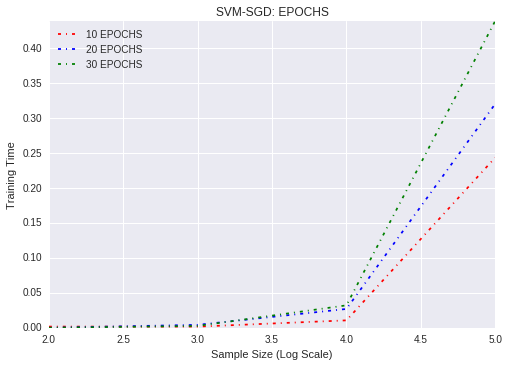

In [73]:
sizes = np.logspace(2,5,4)
np.random.seed(108783)
acc_tr_svmsgd_10, acc_ts_svmsgd_10, times_svmsgd_10 = test_svmsgd(sizes, n_vars=10, regularizer = 1, n_epochs = 10)
print acc_tr_svmsgd_10 
print acc_ts_svmsgd_10
print times_svmsgd_10
acc_tr_svmsgd_20, acc_ts_svmsgd_20, times_svmsgd_20 = test_svmsgd(sizes, n_vars=10, regularizer = 1, n_epochs = 20)
print acc_tr_svmsgd_20 
print acc_ts_svmsgd_20
print times_svmsgd_20
acc_tr_svmsgd_30, acc_ts_svmsgd_30, times_svmsgd_30 = test_svmsgd(sizes, n_vars=10, regularizer = 1, n_epochs = 30)
print acc_tr_svmsgd_30 
print acc_ts_svmsgd_30
print times_svmsgd_30
draw_size_time_3(sizes, times_svmsgd_10, times_svmsgd_20, times_svmsgd_30, '10 EPOCHS', '20 EPOCHS', '30 EPOCHS',
                'SVM-SGD: EPOCHS','upper left')

## 5.1.2 CACHE SIZE

100
Accuracy = 93% (93/100) (classification)
Accuracy = 62.465% (12493/20000) (classification)
1000
Accuracy = 93.9% (939/1000) (classification)
Accuracy = 82.885% (16577/20000) (classification)
10000
Accuracy = 96.38% (9638/10000) (classification)
Accuracy = 92.675% (18535/20000) (classification)
100000
Accuracy = 98.19% (98190/100000) (classification)
Accuracy = 97.145% (19429/20000) (classification)
[ 93.    93.9   96.38  98.19]
[ 62.465  82.885  92.675  97.145]
[  1.04900000e-03   5.12100000e-02   3.46983400e+00   2.93223346e+02]
100
Accuracy = 91% (91/100) (classification)
Accuracy = 61.2% (12240/20000) (classification)
1000
Accuracy = 93.4% (934/1000) (classification)
Accuracy = 82.49% (16498/20000) (classification)
10000
Accuracy = 96.16% (9616/10000) (classification)
Accuracy = 92.77% (18554/20000) (classification)
100000
Accuracy = 98.302% (98302/100000) (classification)
Accuracy = 97.505% (19501/20000) (classification)
[ 91.     93.4    96.16   98.302]
[ 61.2    82.49   92.77

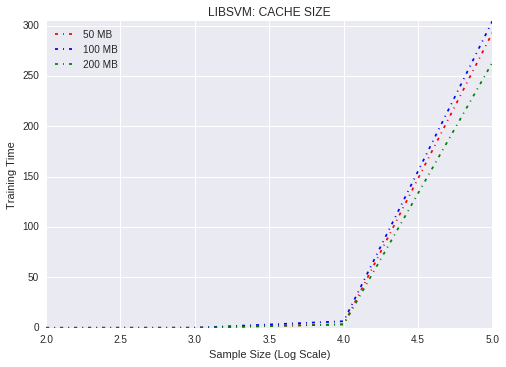

In [10]:
#sizes = np.logspace(2,4,3)
sizes = np.logspace(2,5,4)
acc_tr, acc_ts, times_50 = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 50, shr = 1)
print acc_tr 
print acc_ts 
print times_50
acc_tr, acc_ts, times_100 = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 1)
print acc_tr 
print acc_ts 
print times_100
acc_ts, acc_ts, times_200 = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 200, shr = 1)
print acc_tr 
print acc_ts 
print times_200
draw_size_time_3(sizes, times_50, times_100, times_200, '50 MB', '100 MB', '200 MB',
                'LIBSVM: CACHE SIZE', 'upper left')

## 5.1.3 SHRINKING

100
Accuracy = 94% (94/100) (classification)
Accuracy = 90.99% (18198/20000) (classification)
1000
Accuracy = 94.4% (944/1000) (classification)
Accuracy = 93.98% (18796/20000) (classification)
10000
Accuracy = 94.24% (9424/10000) (classification)
Accuracy = 94.18% (18836/20000) (classification)
100000
Accuracy = 94.327% (94327/100000) (classification)
Accuracy = 94.195% (18838/20000) (classification)
[ 94.     94.4    94.24   94.327]
[ 90.99   93.98   94.18   94.195]
[  4.41000000e-04   1.99480000e-02   1.98332400e+00   5.55163643e+02]
100
Accuracy = 94% (94/100) (classification)
Accuracy = 90.99% (18198/20000) (classification)
1000
Accuracy = 94.4% (944/1000) (classification)
Accuracy = 93.98% (18796/20000) (classification)
10000
Accuracy = 94.24% (9424/10000) (classification)
Accuracy = 94.18% (18836/20000) (classification)
100000
Accuracy = 94.327% (94327/100000) (classification)
Accuracy = 94.195% (18838/20000) (classification)
[ 94.     94.4    94.24   94.327]
[ 90.99   93.98   94

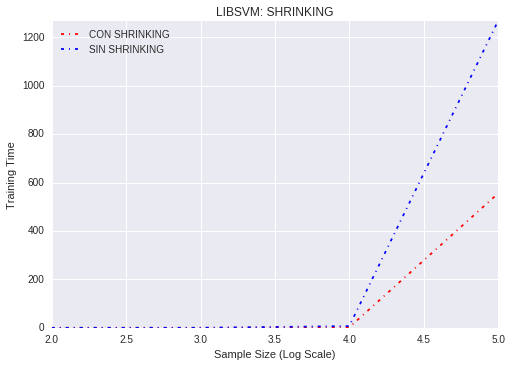

In [13]:
#sizes = np.logspace(2,4,3)
sizes = np.logspace(2,5,4)
acc_tr, acc_ts, times_csh = test_libsvm(sizes, kerneltype = 0, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 1)
print acc_tr 
print acc_ts
print times_csh
acc_tr, acc_ts, times_ssh = test_libsvm(sizes, kerneltype = 0, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 0)
print acc_tr 
print acc_ts
print times_ssh
draw_size_time_2(sizes, times_csh, times_ssh, 'CON SHRINKING', 'SIN SHRINKING',
                'LIBSVM: SHRINKING', 'upper left')

100
Accuracy = 87% (87/100) (classification)
Accuracy = 57.945% (11589/20000) (classification)
1000
Accuracy = 92.8% (928/1000) (classification)
Accuracy = 81.83% (16366/20000) (classification)
10000
Accuracy = 96.03% (9603/10000) (classification)
Accuracy = 92.685% (18537/20000) (classification)
100000
Accuracy = 98.213% (98213/100000) (classification)
Accuracy = 97.305% (19461/20000) (classification)
[ 87.     92.8    96.03   98.213]
[ 57.945  81.83   92.685  97.305]
[  7.25000000e-04   4.52850000e-02   3.57761900e+00   2.82445407e+02]
100
Accuracy = 91% (91/100) (classification)
Accuracy = 61.83% (12366/20000) (classification)
1000
Accuracy = 92.1% (921/1000) (classification)
Accuracy = 80.805% (16161/20000) (classification)
10000
Accuracy = 95.94% (9594/10000) (classification)
Accuracy = 92.655% (18531/20000) (classification)
100000
Accuracy = 98.222% (98222/100000) (classification)
Accuracy = 97.15% (19430/20000) (classification)
[ 91.     92.1    95.94   98.222]
[ 61.83   80.805 

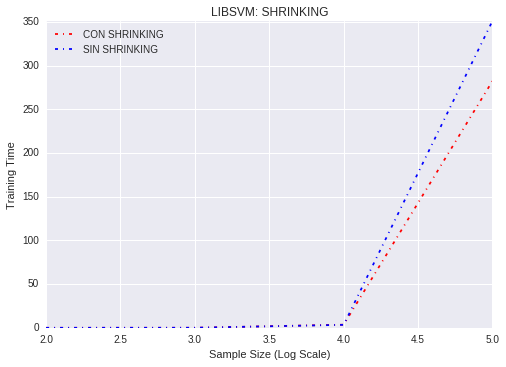

In [11]:
#sizes = np.logspace(2,4,3)
sizes = np.logspace(2,5,4)
acc_tr, acc_ts, times_csh = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 1)
print acc_tr 
print acc_ts
print times_csh
acc_tr, acc_ts, times_ssh = test_libsvm_nonlinear(sizes, kerneltype = 2, gamma = .10, n_vars=10, regularizer = 1, cache = 100, shr = 0)
print acc_tr 
print acc_ts
print times_ssh
draw_size_time_2(sizes, times_csh, times_ssh, 'CON SHRINKING', 'SIN SHRINKING',
                'LIBSVM: SHRINKING', 'upper left')

# A P E N D I C E 

In [58]:
#cs = np.logspace(2,6,5)
cs = np.logspace(2,3,2)
n_total = int(cs[len(cs)-1]*1.2)
n_test = int(cs[len(cs)-1]*.2)

print n_total
print n_test

X, y = make_classification(n_samples = n_total, n_features=2, n_redundant=0, n_informative=2,
                           random_state=108783, n_clusters_per_class=1)

rng = np.random.RandomState(108783)
X = X + 2 * rng.uniform(size=X.shape)

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = n_test, random_state = 108783)

1200
200


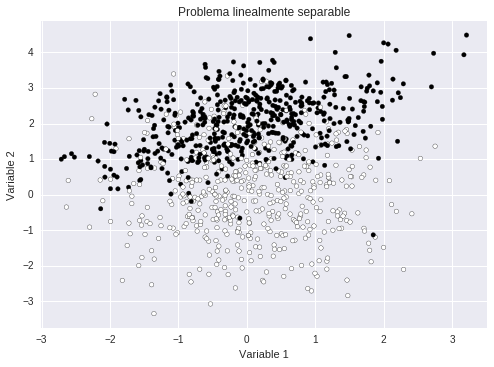

In [60]:
plt.scatter(X_train_full[:,0], X_train_full[:,1], c=y_train_full)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Problema linealmente separable')
plt.axis('tight')
plt.show()

In [61]:
X = np.random.randn(1000, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

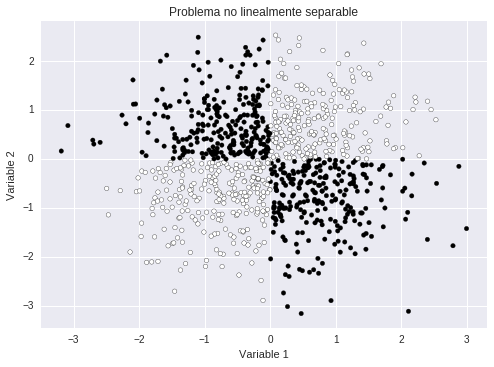

In [62]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Problema no linealmente separable')
plt.axis('tight')
plt.show()

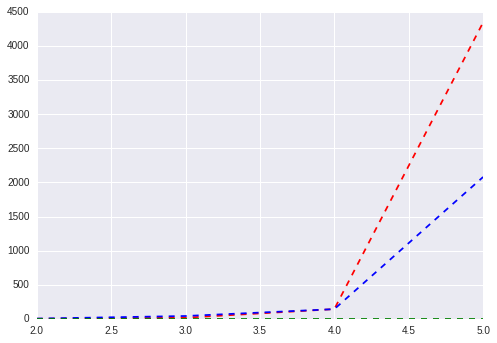

In [103]:
sizes = np.logspace(2,5,4)
bar_locations = np.log10(sizes)
bar_width = 0
#plt.bar(bar_locations,(times_lin/times_svmsgd), color='g')
#plt.bar(bar_locations - 0*bar_width,(times_svmsgd/times_svmsgd), color='b')
#plt.bar(bar_locations - 0*bar_width,(times_rbf/times_svmsgd), color='r')

plt.plot(np.log10(sizes), times_lin/times_svmsgd, 'r--' )
plt.plot(np.log10(sizes), times_rbf/times_svmsgd, 'b--')
plt.plot(np.log10(sizes), times_svmsgd/times_svmsgd, 'g--')